In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.impute import SimpleImputer
# from sklearn_pandas import CategoricalImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
# Helper packages
from plotnine import *

# Modeling packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('../data/ML.csv')

In [3]:
df.columns

Index(['user_id', 'id', 'len_of_title', 'price', 'len_of_content',
       'img_in_posd', 'beds', 'livings', 'wc', 'area', 'street_width', 'age',
       'ketchen', 'ac', 'furnished', 'district', 'advertiser_type', 'review',
       'profileImg', 'iam_verified', 'DayOfRent', 'onMarket', 'timeBeforeRent',
       'zone', 'createYEAR', 'createMONTH', 'createDAY', 'lUpdateYEAR',
       'lUpdateMONTH', 'lUpdateDAY', 'isRent'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['createYEAR'] = labelencoder_X.fit_transform(df['createYEAR'])  
df['createDAY'] = labelencoder_X.fit_transform(df['createDAY']) 
df['createMONTH'] = labelencoder_X.fit_transform(df['createMONTH']) 
df['lUpdateDAY'] = labelencoder_X.fit_transform(df['lUpdateDAY']) 
df['lUpdateMONTH'] = labelencoder_X.fit_transform(df['lUpdateMONTH']) 
df['lUpdateYEAR'] = labelencoder_X.fit_transform(df['lUpdateYEAR']) 

## ready for Pipeline

delete low varince

In [5]:
nzv = VarianceThreshold(threshold=0.1)

dealing with Skewness

In [6]:
yj = PowerTransformer(method="yeo-johnson")
# X_norm = ColumnTransformer([("norm", yj, selector(dtype_include="number"))])

Standardization

In [7]:
scaler = StandardScaler()

# standardize all numeric features
# std = ColumnTransformer([("norm", scaler, selector(dtype_include="number"))])

OneHotEncoder for advertiser_type

In [8]:
encoder = OneHotEncoder(handle_unknown="ignore")


pca to try if it going to help 

In [9]:
df.shape[1]

31

In [10]:
# pca = PCA(n_components=5)


In [11]:
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
  ("nzv_encode", nzv, selector(dtype_include="number")),
  ("norm", yj, selector(dtype_include="number")),
  ("std_encode", scaler, selector(dtype_include="number")),
  # ("pca_encode", pca, selector(dtype_include="number")),
  ("one-hot", encoder, selector(dtype_include="object")),
  ])

In [12]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('nzv_encode', VarianceThreshold(threshold=0.1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426a590>),
                                ('norm', PowerTransformer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426a560>),
                                ('std_encode', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd4269ba0>),
                                ('one-hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426aa10>)])

In [13]:
# df.shape

here i dropped DayOfRent bevouse isRent is dependent on DayOfRent so there is no meaning on adding it 

timeBeforeRent is also depedns on DayOfRent (dayOFrent - createDate)

for the id  when use it the accuracy increae ( becouse it is orderd)  as you can see 

In [14]:
temp = pd.read_csv('../data/aqar.csv')
temp[['id' , 'create_time'] ].sort_values(by='id')

,id,create_time
3866,211899,"['2016-05-26', '15:44:24']"
3830,779331,"['2017-11-23', '16:28:34']"
1703,825676,"['2017-12-30', '16:06:27']"
557,879567,"['2018-02-08', '19:20:10']"
533,1269068,"['2018-11-28', '16:02:25']"
...,...,...
491,4600178,"['2022-08-06', '12:05:24']"
1635,4600194,"['2022-08-06', '12:11:55']"
6710,4600222,"['2022-08-06', '12:21:15']"
26,4600237,"['2022-08-06', '12:24:50']"


we can see that the first id has the oldest creation date and the last id has the  date of my webscraping

but the reason of droping the value are they dont help my misk capstone project 

even though it increase the accuracy but what i want to build is depending about the apartment you have and the featurs of the apartment (the age , the bedrooms , the price you want ... etc ) and i can't ask the user what is your id 


In [15]:
X = df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent' ,  'id' , 'onMarket'  ] , axis=1)
y = df['isRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# training & prediction


# logistic Regerssion

In [16]:
lr = LogisticRegression(max_iter=500)

model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("lr", lr),
])

In [17]:
model_pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426a590>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426a560>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd4269ba0>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426aa10>)])),
                ('lr', LogisticRegression(max_iter=500))])

In [18]:
model_pipeline.score(X_test , y_test)

0.6116557734204793

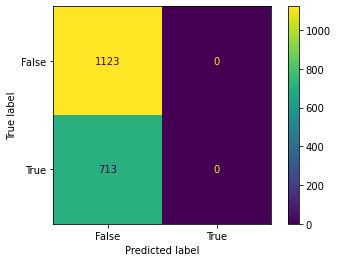

In [19]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [20]:
# # Helper packages
# import numpy as np
# import pandas as pd
# from plotnine import *
# from scipy.stats import uniform
# from scipy.stats import randint

# # Modeling packages
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from category_encoders.ordinal import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.compose import make_column_selector as selector
# from sklearn.compose import ColumnTransformer
# from sklearn.compose import make_column_selector as selector
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.inspection import partial_dependence
# from sklearn.pipeline import Pipeline

# Random Forest


In [21]:
rf_mod = RandomForestClassifier()

# create modeling pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

In [22]:
model_pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426a590>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426a560>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd4269ba0>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fedd426aa10>)])),
                ('rf_mod', RandomForestClassifier())])

In [23]:
model_pipeline.score(X_test , y_test)

0.7222222222222222

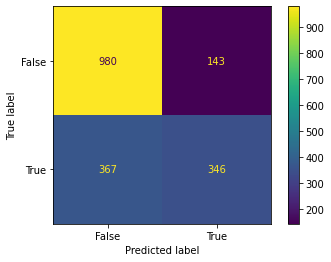

In [24]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [25]:
print(classification_report(y_test,  model_pipeline.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.73      0.87      0.79      1123
         pos       0.71      0.49      0.58       713

    accuracy                           0.72      1836
   macro avg       0.72      0.68      0.68      1836
weighted avg       0.72      0.72      0.71      1836



In [26]:
r = permutation_importance(
  model_pipeline, 
  X_train, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

KeyboardInterrupt: 

 # Decision Tree 

In [ ]:
rf_mod = DecisionTreeClassifier()

In [ ]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

In [ ]:
model_pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8431b0e740>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8431b0e7a0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8431b0c9a0>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8431b0caf0>)])),
                ('rf_mod', DecisionTreeClassifier())])

In [ ]:
model_pipeline.score(X_test , y_test)

0.6721132897603486

In [ ]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))

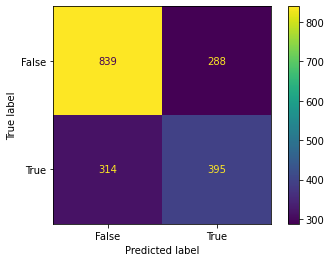

In [ ]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [ ]:
print(classification_report(y_test,  model_pipeline.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.73      0.74      0.74      1127
         pos       0.58      0.56      0.57       709

    accuracy                           0.67      1836
   macro avg       0.65      0.65      0.65      1836
weighted avg       0.67      0.67      0.67      1836



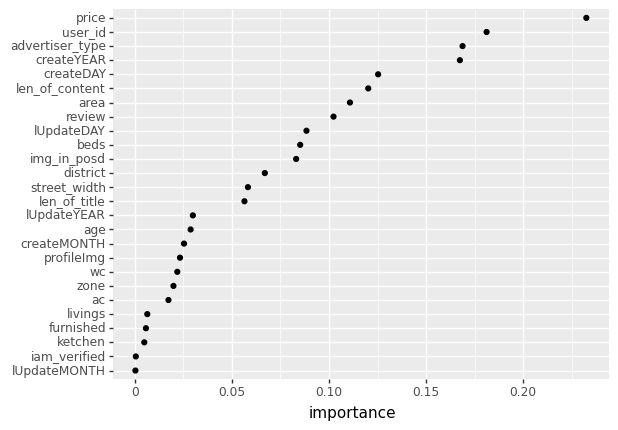

<ggplot: (8762858354547)>

In [ ]:
r = permutation_importance(
  model_pipeline, 
  X_train, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

## Gini impurity

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [ ]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("clf_gini", clf_gini),
])

In [ ]:
model_pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8431b0e740>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8431b0e7a0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8431b0c9a0>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8431b0caf0>)])),
                ('clf_gini',
                 DecisionTreeClassifier(max_depth=3, random_state=0))])

In [ ]:
# print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

In [ ]:
y_pred_train_gini = model_pipeline.predict(X_train)

y_pred_train_gini

array([ True, False, False, ..., False, False, False])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6604


In [ ]:
print('Training set score: {:.4f}'.format(model_pipeline.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_pipeline.score(X_test, y_test)))

Training set score: 0.6604
Test set score: 0.6356


------

In [ ]:
ax = pd.DataFrame()
ax['methodName'] = ''
ax['PCA'] = ''
ax['accurcy'] = ''

In [ ]:
ax = ax.append({'methodName' : 'Ankit', 'PCA' : 97, 'accurcy' : 2200}, ignore_index = True)
ax

/tmp/ipykernel_16597/2493101426.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,methodName,PCA,accurcy
0,Ankit,97,2200
1,Ankit,97,2200


In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
ax = pd.DataFrame()
ax['methodName'] = ''
ax['PCA'] = ''
ax['accurcy'] = ''
for i in range(5,22,1):
    scaler = StandardScaler()
    yj = PowerTransformer(method="yeo-johnson")
    nzv = VarianceThreshold(threshold=0.1)
    encoder = OneHotEncoder(handle_unknown="ignore")
    pca = PCA(n_components=i)
    X = df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent' ,  'id' , 'onMarket'  ] , axis=1)
    y = df['isRent']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # training & prediction
    preprocessor = ColumnTransformer(
      remainder="passthrough",
      transformers=[
      ("nzv_encode", nzv, selector(dtype_include="number")),
      ("norm", yj, selector(dtype_include="number")),
      ("std_encode", scaler, selector(dtype_include="number")),
      ("pca_encode", pca, selector(dtype_include="number")),
      ("one-hot", encoder, selector(dtype_include="object")),
      ])


    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="rbf", C=0.025, probability=True),
        NuSVC(probability=True),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis()
        ]

    # Logging for Visual Comparison
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols)

    for clf in classifiers:
        model_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("clf", clf),
        ])
        model_pipeline.fit(X_train, y_train)
        name = clf.__class__.__name__
        
        # print("="*30)
        # print(name)
        
        # print('****Results****')
        train_predictions = model_pipeline.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        ax = ax.append({'methodName' : name , 'PCA' : i, 'accurcy' : acc*100}, ignore_index = True)
        # print("Accuracy: {:.4%}".format(acc))
        
        train_predictions = model_pipeline.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        # print("Log Loss: {}".format(ll))
        
        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
        log = log.append(log_entry)
        
        # print("="*30 , i,"PCA")

/tmp/ipykernel_16597/1064935301.py:66: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_16597/1064935301.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_16597/1064935301.py:66: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_16597/1064935301.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_16597/1064935301.py:66: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_16597/1064935301.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a 

In [ ]:
ax

,methodName,PCA,accurcy
0,KNeighborsClassifier,5,67.647059
1,SVC,5,62.908497
2,NuSVC,5,46.840959
3,DecisionTreeClassifier,5,67.102397
4,RandomForestClassifier,5,73.529412
...,...,...,...
165,AdaBoostClassifier,21,69.117647
166,GradientBoostingClassifier,21,71.241830
167,GaussianNB,21,59.259259
168,LinearDiscriminantAnalysis,21,67.265795


In [ ]:
import plotly.express as px
# df = px.data.gapminder()
fig = px.scatter(ax, x="PCA", y="accurcy", color="methodName" , log_x=True, size_max=60)
fig.show()

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
ax = pd.DataFrame()
ax['methodName'] = ''
ax['PCA'] = ''
ax['accurcy'] = ''
for i in range(5,22,1):
    scaler = StandardScaler()
    yj = PowerTransformer(method="yeo-johnson")
    nzv = VarianceThreshold(threshold=0.1)
    encoder = OneHotEncoder(handle_unknown="ignore")
    pca = PCA(n_components=i)
    X = df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent' ,  'id' , 'onMarket'  ] , axis=1)
    y = df['isRent']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # training & prediction
    preprocessor = ColumnTransformer(
      remainder="passthrough",
      transformers=[
      ("nzv_encode", nzv, selector(dtype_include="number")),
      ("norm", yj, selector(dtype_include="number")),
      ("std_encode", scaler, selector(dtype_include="number")),
      ("pca_encode", pca, selector(dtype_include="number")),
      ("one-hot", encoder, selector(dtype_include="object")),
      ])


    classifiers = [
        # KNeighborsClassifier(3),
        # SVC(kernel="rbf", C=0.025, probability=True),
        # NuSVC(probability=True),
        # DecisionTreeClassifier(),
        RandomForestClassifier(),
        # AdaBoostClassifier(),
        GradientBoostingClassifier(),
        # GaussianNB(),
        # LinearDiscriminantAnalysis(),
        # QuadraticDiscriminantAnalysis(),
        svm.SVC(kernel='linear')
        ]

    # Logging for Visual Comparison
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols)

    for clf in classifiers:
        model_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("clf", clf),
        ])
        model_pipeline.fit(X_train, y_train)
        name = clf.__class__.__name__
        
        # print("="*30)
        # print(name)
        
        # print('****Results****')
        train_predictions = model_pipeline.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        ax = ax.append({'methodName' : name , 'PCA' : i, 'accurcy' : acc*100}, ignore_index = True)
        # print("Accuracy: {:.4%}".format(acc))
        
        train_predictions = model_pipeline.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        # print("Log Loss: {}".format(ll))
        
        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
        log = log.append(log_entry)
        
        # print("="*30 , i,"PCA")

/tmp/ipykernel_9856/3030937778.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_9856/3030937778.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_9856/3030937778.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_9856/3030937778.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [ ]:
ax

,methodName,PCA,accurcy
0,RandomForestClassifier,5,72.276688
1,GradientBoostingClassifier,5,68.627451
2,SVC,5,59.586057


In [31]:
from sklearn.neighbors import KNeighborsClassifier
ax = pd.DataFrame()
# ax['methodName'] = ''
ax['PCA'] = ''
ax['accurcy'] = ''
for j in range(5,22,1):
    scaler = StandardScaler()
    yj = PowerTransformer(method="yeo-johnson")
    nzv = VarianceThreshold(threshold=0.1)
    encoder = OneHotEncoder(handle_unknown="ignore")
    pca = PCA(n_components=j)
    X = df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent' ,  'id' , 'onMarket'  ] , axis=1)
    y = df['isRent']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # training & prediction
    preprocessor = ColumnTransformer(
      remainder="passthrough",
      transformers=[
      ("nzv_encode", nzv, selector(dtype_include="number")),
      ("norm", yj, selector(dtype_include="number")),
      ("std_encode", scaler, selector(dtype_include="number")),
      ("pca_encode", pca, selector(dtype_include="number")),
      ("one-hot", encoder, selector(dtype_include="object")),
      ])
#Setup arrays to store training and test accuracies
    neighbors = np.arange(1,9)
    train_accuracy =np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    for i,k in enumerate(neighbors):

        #Setup a knn classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k)
        model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("knn", knn)])
        #Fit the model
        model_pipeline.fit(X_train, y_train)
        
        #Compute accuracy on the training set
        train_accuracy[i] = model_pipeline.score(X_train, y_train)
        # ax = ax.append({ 'PCA' : i, 'accurcy' :  model_pipeline.score(X_train, y_train)}, ignore_index = True)
        
        #Compute accuracy on the test set
        test_accuracy[i] = model_pipeline.score(X_test, y_test) 
        ax = ax.append({ 'PCA' : j, 'accurcy' :   model_pipeline.score(X_test, y_test) }, ignore_index = True)


/tmp/ipykernel_14068/1567874194.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_14068/1567874194.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_14068/1567874194.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_14068/1567874194.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_14068/1567874194.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_14068/1567874194.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [32]:
ax[ax['accurcy'] == ax['accurcy'].max()]

,PCA,accurcy
3,5.0,0.693355


In [ ]:
train_accuracy

array([0.99976641, 0.83742116, 0.82574165, 0.78696566, 0.77902359,
       0.76220509, 0.75706611, 0.74398505])

In [ ]:
df = pd.read_csv('../data/ML.csv')
df.

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("model", model),
])
model_pipeline.fit(X_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

[1.46916555e-02 1.14631003e-02 1.28311501e-02 1.34170493e-02
 1.24359605e-02 9.57297291e-03 5.96816368e-03 7.84977758e-03
 1.25309112e-02 1.18292675e-02 1.09817403e-02 4.02740692e-03
 4.26190464e-03 1.19766600e-02 7.49533520e-03 8.67396062e-03
 1.38944244e-02 2.42745013e-03 2.27951311e-03 1.40483757e-02
 1.51459480e-02 1.19921136e-02 1.33175618e-02 1.25390206e-02
 1.25079856e-02 9.49036150e-03 5.65271221e-03 8.58477551e-03
 1.37235822e-02 1.22315473e-02 1.13685490e-02 3.76932292e-03
 4.43157186e-03 3.06717868e-03 1.25729440e-02 8.79346024e-03
 9.61376755e-03 1.37978688e-02 2.76900735e-03 2.40173926e-03
 1.42898332e-02 1.48154472e-02 1.08002228e-02 1.29365712e-02
 1.28704068e-02 1.29493421e-02 9.24873901e-03 5.69363025e-03
 7.98784184e-03 1.23847922e-02 1.24969978e-02 1.05012258e-02
 4.12605564e-03 4.08590511e-03 3.22612475e-03 1.21755053e-02
 7.19000321e-03 6.64564926e-03 1.38225952e-02 2.42241921e-03
 2.69719889e-03 1.38337306e-02 1.65509576e-02 1.37470833e-02
 1.25354990e-02 1.291518

ValueError: Length of values (210) does not match length of index (26)